# Business Case: Aerofit - Descriptive Statistics & Probability

## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Exploration

In [2]:
data = pd.read_csv("C:/Users/ARYAN/OneDrive/Documents/My Repository/Datasources/aerofit_treadmill.txt")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.shape

(180, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [8]:
(data["Gender"].value_counts()/data["Gender"].count()).round(2)

Male      0.58
Female    0.42
Name: Gender, dtype: float64

### Gender Probability
- P(Male) : 0.58
- P(Female) : 0.42 

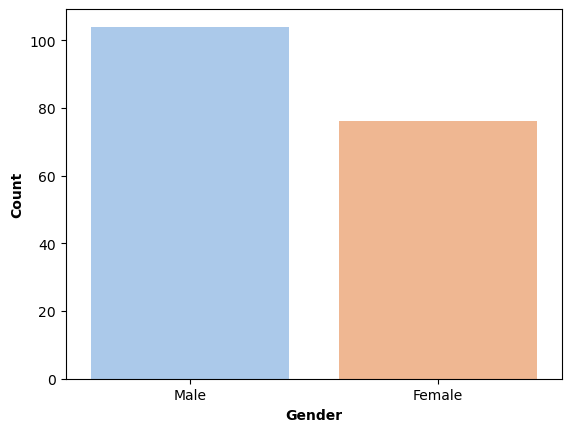

In [9]:
sns.countplot(x = data["Gender"], palette = "pastel")
plt.xlabel("Gender", fontweight = "bold")
plt.ylabel("Count", fontweight = "bold")
plt.show()

In [10]:
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [11]:
(data["MaritalStatus"].value_counts()/data["MaritalStatus"].count()).round(2)

Partnered    0.59
Single       0.41
Name: MaritalStatus, dtype: float64

### Marital Status Probability
- P(Partnered) : 0.59
- P(Single) : 0.41

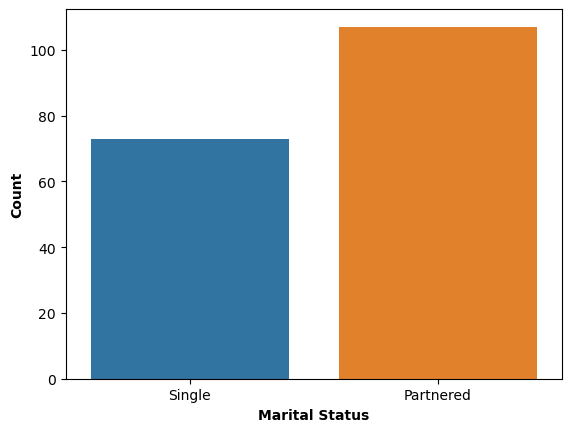

In [12]:
sns.countplot(x = data["MaritalStatus"])
plt.xlabel("Marital Status", fontweight = "bold")
plt.ylabel("Count", fontweight = "bold")
plt.show()

In [13]:
data["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
(data["Product"].value_counts()/data["Product"].count()).round(2)

KP281    0.44
KP481    0.33
KP781    0.22
Name: Product, dtype: float64

### Product Probability
- P(KP281) : 0.44
- P(KP481) : 0.33
- P(KP781) : 0.22

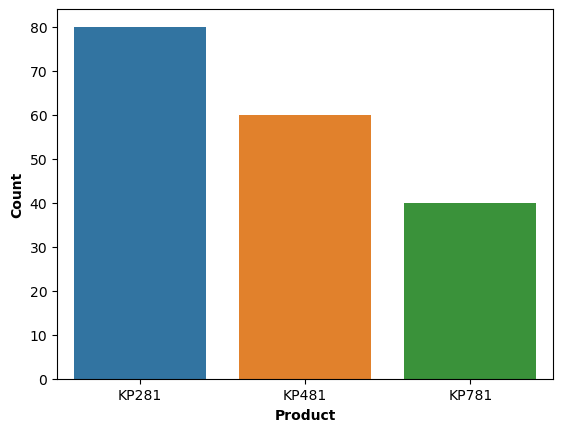

In [15]:
sns.countplot(x = data["Product"])
plt.xlabel("Product", fontweight = "bold")
plt.ylabel("Count", fontweight = "bold")
plt.show()

## Univariate Analysis

### Understanding the distribution of the data for the quantitative attributes:
- Age
- Education
- Usage
- Fitness
- Income
- Miles

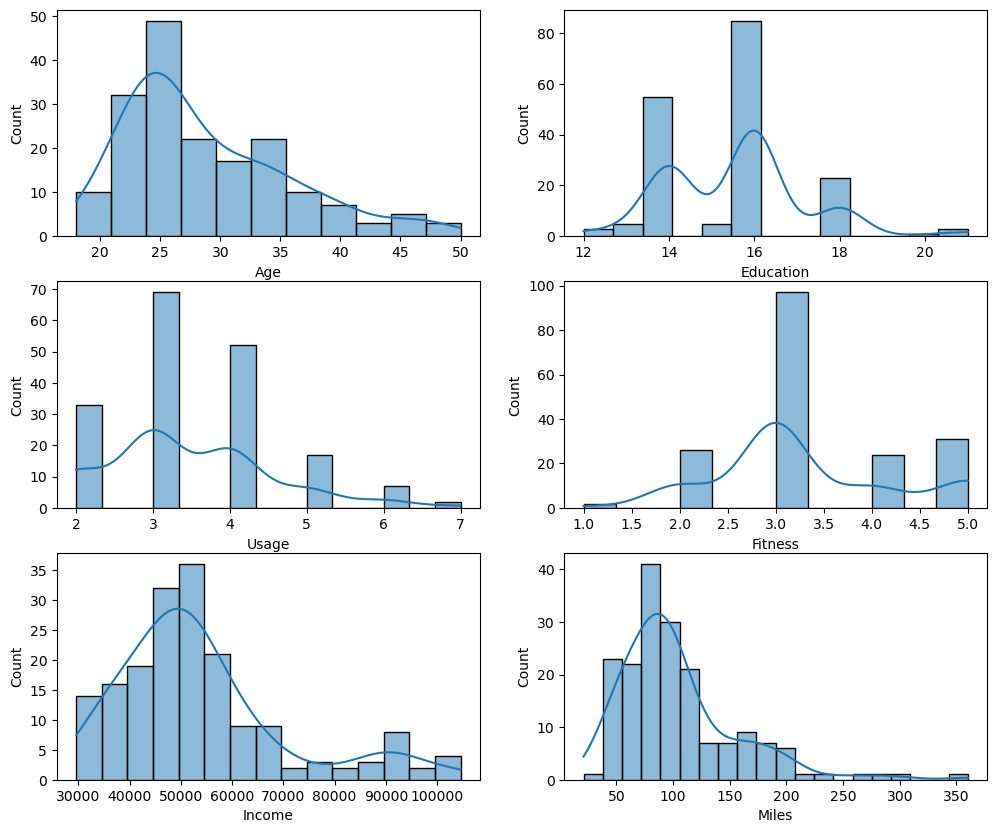

In [16]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.histplot(data=data, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=data, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=data, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=data, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=data, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=data, x="Miles", kde=True, ax=axis[2,1])
plt.show()

## Insights after initial exploration
- There are no missing values in the data.
- There are 3 unique products in the dataset.
- The given data has 180 records and 9 features.
- Out of the 180 users, 104 are males and 74 are females.
- 107 users are partnered and 73 are single.
- The average age of buyers is 28.79 years.
- The average income of the users is 53717.54$.
- Most of the people(75%) are having less than 16 years of education.
- 44.44% users have bought the entry level(KP281), 33.33% users have bought medium level(KP481) and 22.22% uers have bought the advanced level(KP781) treadmills.

## Analysing linear relationship between features

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_3776\3574203304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


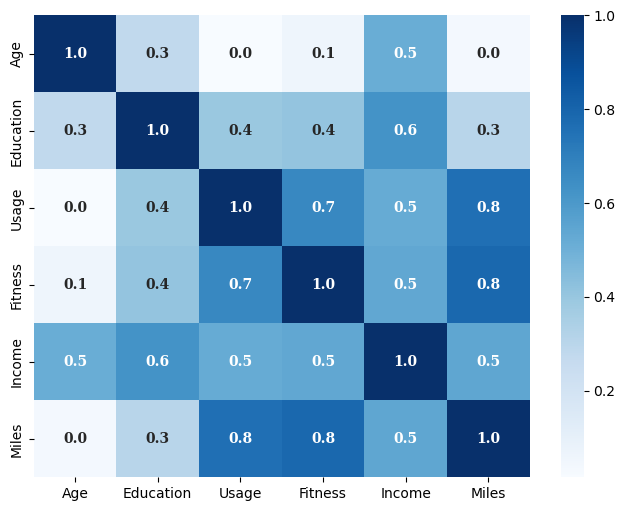

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), 
            cmap = "Blues", 
            fmt = "0.1f",
            annot = True, 
            annot_kws = {"fontfamily" : "serif",
                            "fontweight" : "bold"})
plt.show()

## Linear relationship between the features
- "Usage" and "Fitness" are highly correlated with "Miles"
- "Usage" and "Fitness" are highly correlated with each other
- "Income" and "Education" seem to be fairly correlated with each other

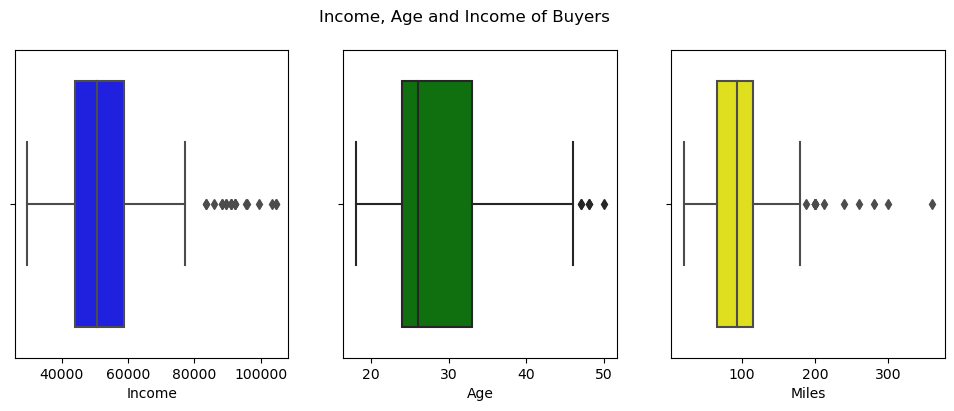

In [18]:
fig, axs = plt.subplots(1,3, figsize = (12, 4))
plt.suptitle("Income, Age and Income of Buyers")
sns.boxplot(ax = axs[0], x = data["Income"], orient = 'h', color = "blue")
sns.boxplot(ax = axs[1], x = data["Age"], orient = 'h', color = "green")
sns.boxplot(ax = axs[2], x = data["Miles"], orient = 'h', color = "yellow")
plt.show()

In [19]:
inc_outliers = 58668 + 1.5*(58668 - 44058.75)   #75th percentile + 1.5*IQR
inc_outliers

80581.875

In [20]:
len(data.loc[data["Income"] > 80581.875])

19

In [21]:
age_outliers =33 + 1.5*(33 - 24)
age_outliers

46.5

In [22]:
len(data.loc[data["Age"] > 46.5])

5

In [23]:
miles_outliers = 114.75 + 1.5*(114.75 - 66)
miles_outliers

187.875

In [24]:
len(data.loc[data["Miles"] > 187.75])

13

### Outliers
- The median income of buyers is 50596.50 dollars and income greater than 80581.875$ are outliers. There are 19 such people.
- The median age of the buyers is 26 years and people aged above 46.5 are treated as outliers. There are 5 such people.
- The median of average number of miles the customer expects to walk/run each week is 94 miles and people expecting to run more than 187.875 miles are treated as outliers. There are 13 such people.

In [25]:
gender_split = pd.crosstab(index = data["Gender"], columns = data["Product"])
gender_split

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


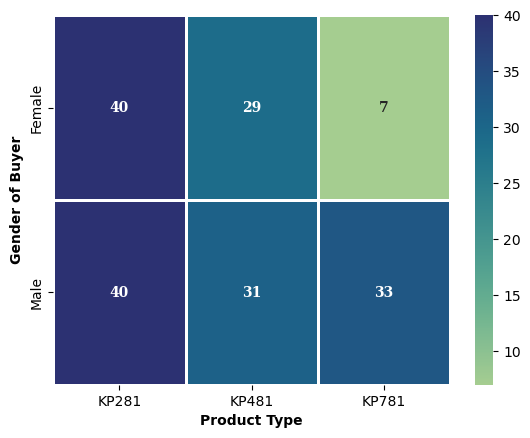

In [26]:
sns.heatmap(gender_split, cmap = "crest", annot = True, annot_kws = {"fontfamily" : "serif", 
                                                                "fontweight" : "bold"}, linewidth = 1)
plt.xlabel("Product Type", fontweight = "bold")
plt.ylabel("Gender of Buyer", fontweight = "bold")
plt.show()

In [27]:
gender_prob = pd.crosstab(index = data["Gender"], columns = data["Product"], normalize = "index")
gender_prob.round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


### Gender V/s Product 
- P(KP281 | Female) : 0.53
- P(KP481 | Female) : 0.38
- P(KP781 | Female) : 0.09
- P(KP281 | Male) : 0.38
- P(KP481 | Male) : 0.30
- P(KP781 | Male) : 0.32

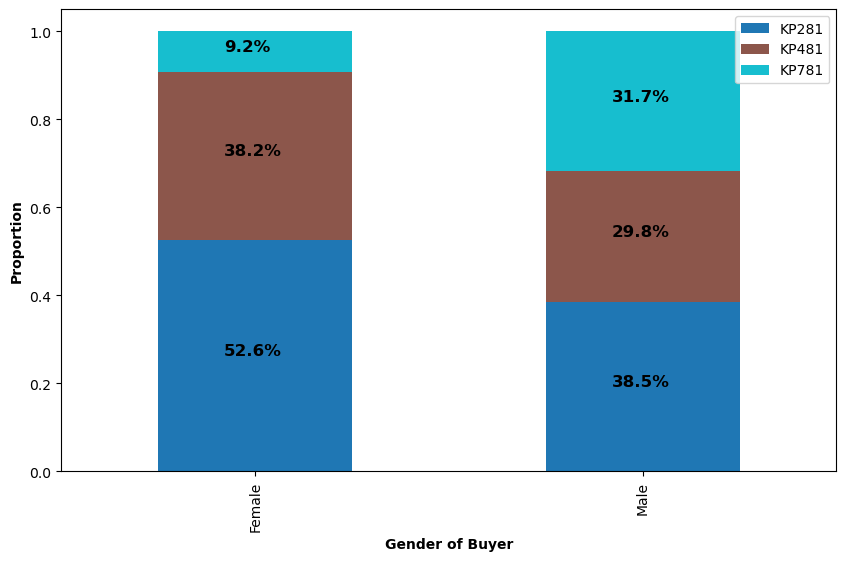

In [28]:
gender_prob.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Gender of Buyer", fontweight = "bold")
plt.ylabel("Proportion", fontweight = "bold")


for n, x in enumerate([*gender_split.index.values]):
    for (proportion, y_loc) in zip(gender_prob.loc[x],
                                   gender_prob.loc[x].cumsum()):
                
        plt.text(x=n - 0.08,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion*100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Gender and their product choice
- More tham half of the females(52.6%) buy the entry level treadmills
- Females are very less likely to buy advanced(9.2%) i.e, KP781 treadmills
- Males are more likely to buy the entry level(38.5%) and advanced level(31.7%) treadmills

In [29]:
prod_pref = pd.crosstab(index = data["MaritalStatus"], columns = data["Product"])
prod_pref

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


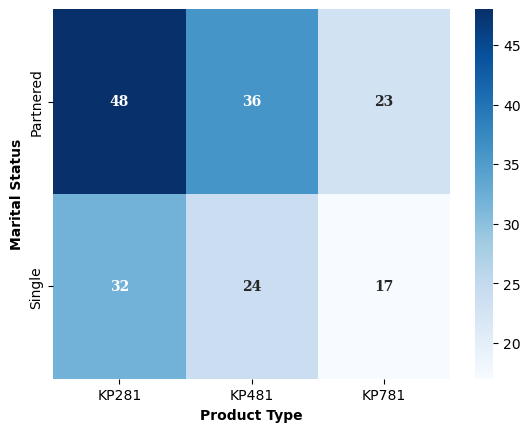

In [30]:
sns.heatmap(prod_pref, cmap = "Blues", annot = True, annot_kws = {"fontfamily" : "serif", "fontweight" : "bold"})
plt.xlabel("Product Type", fontweight = "bold")
plt.ylabel("Marital Status", fontweight = "bold")
plt.show()

In [31]:
product_pref_prob = pd.crosstab(index = data["MaritalStatus"], columns = data["Product"], normalize = "index")
product_pref_prob.round(2)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.45,0.34,0.21
Single,0.44,0.33,0.23


### Product V/s Marital Status
- P(KP281 | Partnered) : 0.45
- P(KP481 | Partnered) : 0.34
- P(KP781 | Partnered) : 0.21
- P(KP281 | Single) : 0.44
- P(KP481 | Single) : 0.33
- P(KP781 | Single) : 0.23

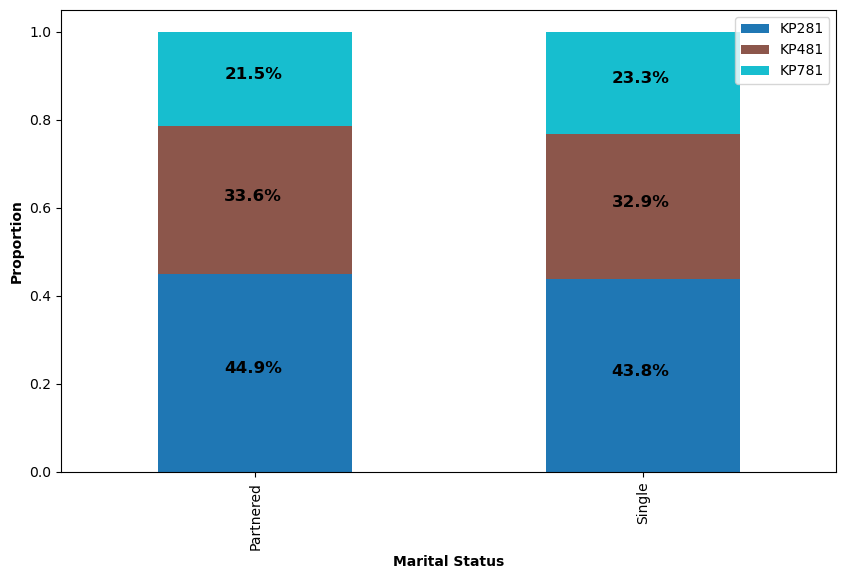

In [32]:
product_pref_prob.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Marital Status", fontweight = "bold")
plt.ylabel("Proportion", fontweight = "bold")


for n, x in enumerate([*prod_pref.index.values]):
    for (proportion, y_loc) in zip(product_pref_prob.loc[x],
                                   product_pref_prob.loc[x].cumsum()):
                
        plt.text(x=n - 0.08,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion*100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Marital Status and their product choice
- Entry level treadmills(KP281) are the first choice among Partnered(44.9%) and Single(43.8%)
- Then follows treadmills(KP481) which have 33.6% in Partnered and 32.9% in Single
- Then follows treadmills(KP781) which have 21.5% in Partnered and 23.3% in Single

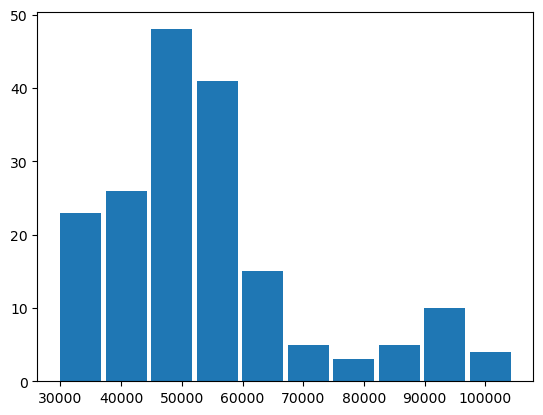

In [33]:
N, bins, patches = plt.hist(data = data, x = "Income", rwidth = 0.9)

In [34]:
bins

array([ 29562. ,  37063.9,  44565.8,  52067.7,  59569.6,  67071.5,
        74573.4,  82075.3,  89577.2,  97079.1, 104581. ])

In [35]:
N

array([23., 26., 48., 41., 15.,  5.,  3.,  5., 10.,  4.])

#### 49.5% buyers have an income between 44565.8 and 59569.6$

In [36]:
KP281 = data.loc[data["Product"] == "KP281"]

In [37]:
KP281.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [38]:
KP481 = data.loc[data["Product"] == "KP481"]

In [39]:
KP481.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53


In [40]:
KP781 = data.loc[data["Product"] == "KP781"]

In [41]:
KP781.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120


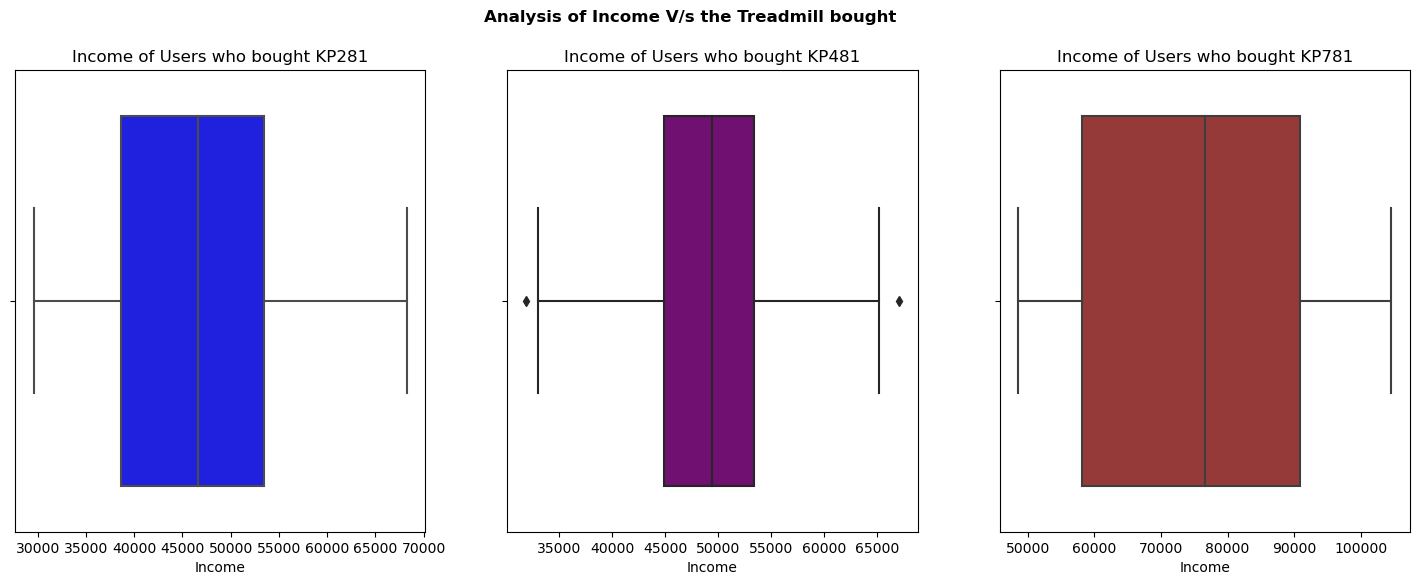

In [42]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
fig.suptitle("Analysis of Income V/s the Treadmill bought", fontweight = "bold")
sns.boxplot(ax= axes[0], x = KP281["Income"], color = "blue")
axes[0].set_title("Income of Users who bought KP281")
sns.boxplot(ax= axes[1], x = KP481["Income"], color = "purple")
axes[1].set_title("Income of Users who bought KP481")
sns.boxplot(ax= axes[2], x = KP781["Income"], color = "brown")
axes[2].set_title("Income of Users who bought KP781")
plt.show()

## From the above boxplots :

### KP281
- The median income of the people buying KP281 is 46617 $.
- In comparison to buyers' income of KP481 and KP781, income of KP281 buyers shows a medium spread.

### KP481
- The median income of the people buying KP481 is 49459.50 $.
- In comparison to buyers' income of KP281 and KP781, income of KP281 buyers shows the least spread.

### KP781
- The median income of the people buying KP281 is 76568 $.
- In comparison to buyers' income of KP281 and KP481, income of KP281 buyers shows the maximum spread.

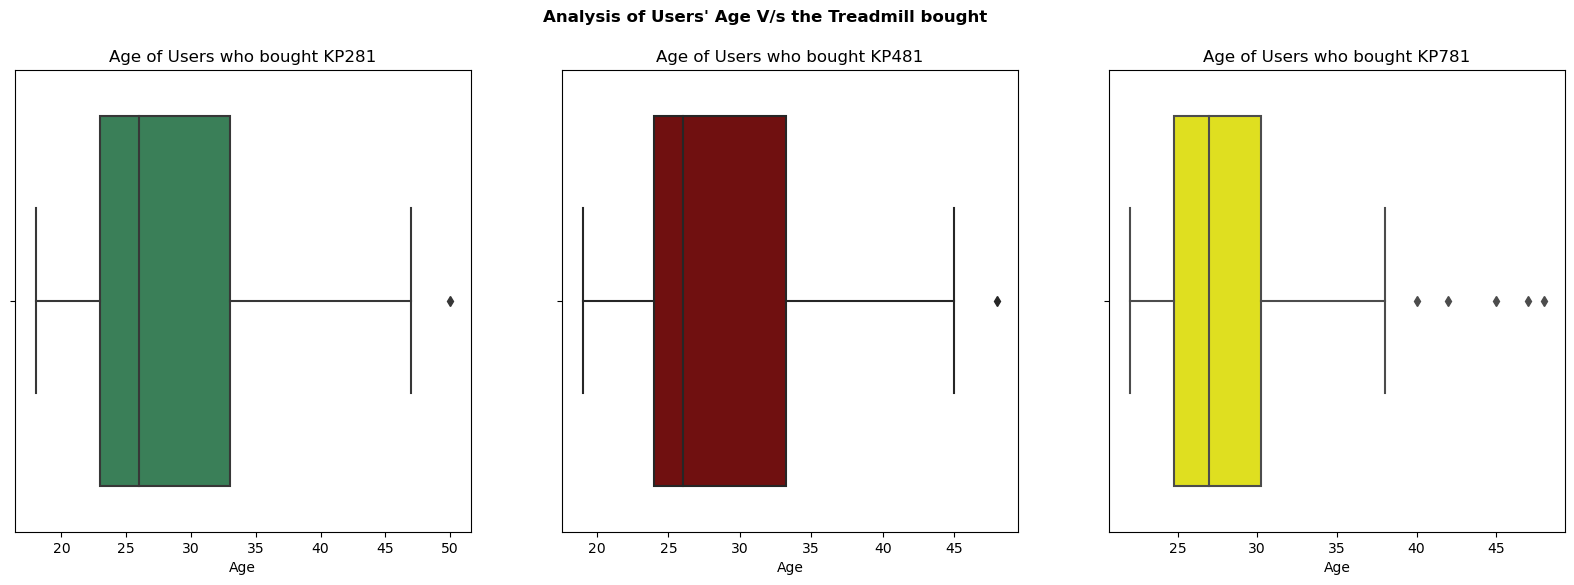

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('''Analysis of Users' Age V/s the Treadmill bought''', fontweight = "bold")
sns.boxplot(ax=axes[0], x=KP281["Age"],color = "seagreen")
axes[0].set_title("Age of Users who bought KP281")
sns.boxplot(ax=axes[1], x=KP481["Age"], color = "maroon")
axes[1].set_title("Age of Users who bought KP481")
sns.boxplot(ax=axes[2], x=KP781["Age"], color = "yellow")
axes[2].set_title("Age of Users who bought KP781")
plt.show()

### As per the above boxplots
- All the three boxplots are righlty skewed
- 50% of the people buying KP281 are aged between 18 - 26 years
- 50% of the people buying KP481 are aged between 19 - 26 years
- 50% of the people buying KP781 are aged between 22 - 27 years

In [44]:
fit_usage = data.groupby("Product")["Fitness", "Usage"].mean()
fit_usage

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_3776\4047030278.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fit_usage = data.groupby("Product")["Fitness", "Usage"].mean()


,Fitness,Usage
Product,,
KP281,2.9625,3.087500
KP481,2.9000,3.066667
KP781,4.6250,4.775000


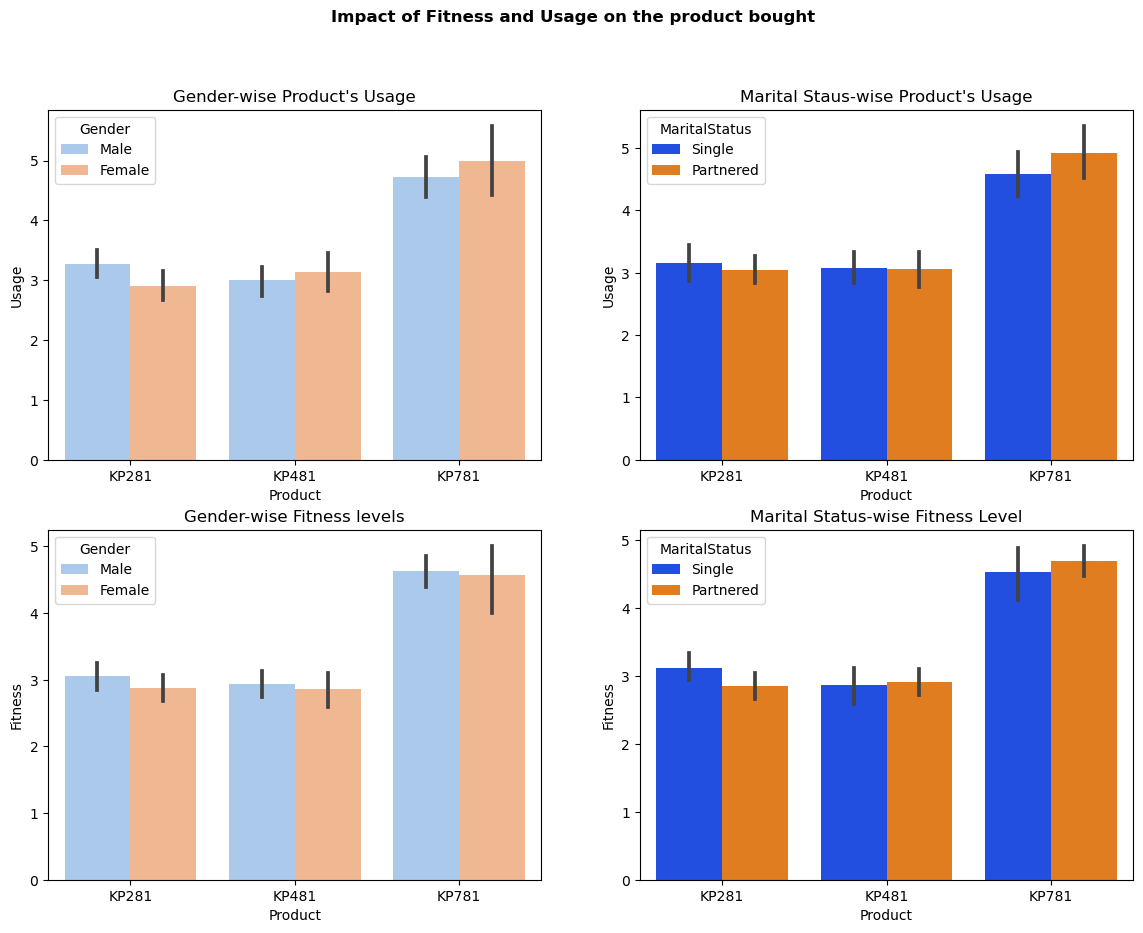

In [45]:
fig, axes = plt.subplots(2,2, figsize = (14, 10))
plt.suptitle("Impact of Fitness and Usage on the product bought", fontweight = "bold")
sns.barplot(ax = axes[0, 0], data = data, x = "Product", y = "Usage", hue = "Gender", palette = "pastel")
axes[0, 0].set(title = "Gender-wise Product's Usage")
sns.barplot(ax = axes[0, 1], data = data, x = "Product", y = "Usage", hue = "MaritalStatus", palette = "bright")
axes[0, 1].set(title = "Marital Staus-wise Product's Usage")
sns.barplot(ax = axes[1, 0], data = data, x = "Product", y = "Fitness", hue = "Gender", palette = "pastel")
axes[1, 0].set(title = "Gender-wise Fitness levels")
sns.barplot(ax = axes[1, 1], data = data, x = "Product", y = "Fitness", hue = "MaritalStatus", palette = "bright")
axes[1, 1].set(title = "Marital Status-wise Fitness Level")
plt.show()

### As per the following barplots
- Most of the people independent of their gender and marital status would purchase a KP281 or KP481 for usage of around 3 times per week.
- Most of the people independent of their gender and marital status would purchase a KP781 for usage of close to 5 times per week.
- Most of the people buying KP281 and KP481 have given themselves a fitness score of almost 3 independent of their gender and marital status.
- Most of the people buying KP781 have given themselves a fitness score of almost 5 independent of their gender and marital status.

## Customer Profiling

### On the basis of Gender and Age
- Age : 18 - 26 & Gender : Male = Young Male
- Age : 18 - 26 & Gender : Female = Young Female
- Age : 27 - 40 & Gender : Male = Mid-aged Male
- Age : 27 - 40 & Gender : Female = Mid-aged Female
- Age : 41 - 50 & Gender = Male = Elderly Male
- Age : 41 - 50 & Gender = Female = Elderly Female"

In [46]:
def cat(x):
    if ((x["Age"] >= 18) & (x["Age"] <= 26)) & (x["Gender"] == "Male"):
        return "Young Male"
    elif ((x["Age"] >= 18) & (x["Age"] <= 26)) & (x["Gender"] == "Female"):
        return "Young Female"
    elif ((x["Age"] > 26) & (x["Age"]<= 40)) & (x["Gender"] == "Male"):
        return "Mid-aged Male"
    elif ((x["Age"] > 26) & (x["Age"]<= 40)) & (x["Gender"] == "Female"):
        return "Mid-aged Female"
    elif ((x["Age"] > 40) & (x["Age"]<= 50)) & (x["Gender"] == "Male"):
        return "Elderly Male"
    elif ((x["Age"] > 40) & (x["Age"]<= 50)) & (x["Gender"] == "Female"):
        return "Elderly Female"

In [47]:
data["Category"] = data.apply(cat, axis = 1)

### On the basis of Fitness score
- Fitness Score >= 4 : Extremely Fit
- Fitness Score = 3 : Moderately Fit
- Fitness Score < 3 : Unfit

In [48]:
def fit(x):
    if (x >= 4):
        return "Extremely Fit"
    elif (x == 3):
        return "Moderately Fit"
    else :
        return "Unfit"

In [49]:
data["Fit"] = data["Fitness"].apply(fit)

### On the basis of Income
- Income between 29561 and 45480 = Low
- Income between 45481 and 54576 = Moderate
- Income between 54577 and 104581 = High

In [50]:
data["Income"].max()

104581

In [51]:
income_bins = [data["Income"].min() - 1, np.percentile(data["Income"], 33), np.percentile(data["Income"], 66), data["Income"].max()]

In [52]:
income_labels = ["Low", "Moderate", "High"]

In [53]:
data["Income Slab"] = pd.cut(data["Income"], bins = income_bins, labels = income_labels)

### Dataframe now

In [54]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Category,Fit,Income Slab
0,KP281,18,Male,14,Single,3,4,29562,112,Young Male,Extremely Fit,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young Male,Moderately Fit,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Female,Moderately Fit,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young Male,Moderately Fit,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Male,Unfit,Low


# Bivariate Analysis

### Evaluating fitness scores

In [55]:
data["Fit"].value_counts()

Moderately Fit    97
Extremely Fit     55
Unfit             28
Name: Fit, dtype: int64

In [56]:
pd.crosstab(index = data["Fit"], columns = data["Product"],normalize = "index").round(2)

Product,KP281,KP481,KP781
Fit,,,
Extremely Fit,0.20,0.15,0.65
Moderately Fit,0.56,0.40,0.04
Unfit,0.54,0.46,0.00


### Fitness V/s Product
- P(KP281 | Extremely Fit) : 0.20
- P(KP481 | Extremely Fit) : 0.15
- P(KP781 | Extremely Fit) : 0.65
- P(KP281 | Moderately Fit) : 0.56
- P(KP481 | Moderately Fit) : 0.40
- P(KP781 | Moderately Fit) : 0.04
- P(KP281 | Unfit) : 0.54
- P(KP481 | Unfit) : 0.46

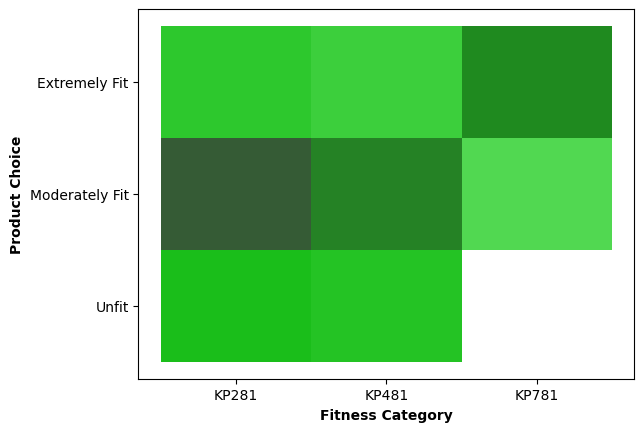

In [57]:
sns.histplot(x = data["Product"], y =data["Fit"], color = "green")
plt.xlabel("Fitness Category", fontweight = "bold")
plt.ylabel("Product Choice", fontweight = "bold")
plt.show()

### Depending upon the fitness, 
- If a person has rated himself/herself to be extremely fit, there is a 0.65 probability that he'll buy a KP781.
- If a person has rated himself/herself to be moderately fit, there is a 0.55 probability that he'll buy a KP281.
- If a person has rated himself/herself to be unfit, there is a 0.53 probability that he'll buy a KP281.

## Evaluating Age and Gender

In [58]:
data["Category"].value_counts()

Young Male         53
Mid-aged Male      42
Young Female       38
Mid-aged Female    35
Elderly Male        9
Elderly Female      3
Name: Category, dtype: int64

In [59]:
pd.crosstab(index = data["Product"], columns = data["Category"], normalize = "index").round(2)

Category,Elderly Female,Elderly Male,Mid-aged Female,Mid-aged Male,Young Female,Young Male
Product,,,,,,
KP281,0.04,0.04,0.21,0.20,0.25,0.26
KP481,0.00,0.03,0.25,0.20,0.23,0.28
KP781,0.00,0.10,0.08,0.35,0.10,0.38


### Category V/s Product
- P(KP281 | Mid-aged Female) : 0.21
- P(KP281 | Mid-aged Male) : 0.20
- P(KP281 | Young Female) : 0.25
- P(KP281 | Young Male) : 0.26
- P(KP481 | Mid-aged Female) : 0.25
- P(KP481 | Young Female) : 0.23
- P(KP481 | Young Male) : 0.28
- P(KP781 | Mid-aged Male) : 0.35
- P(KP781 | Young Male) : 0.38

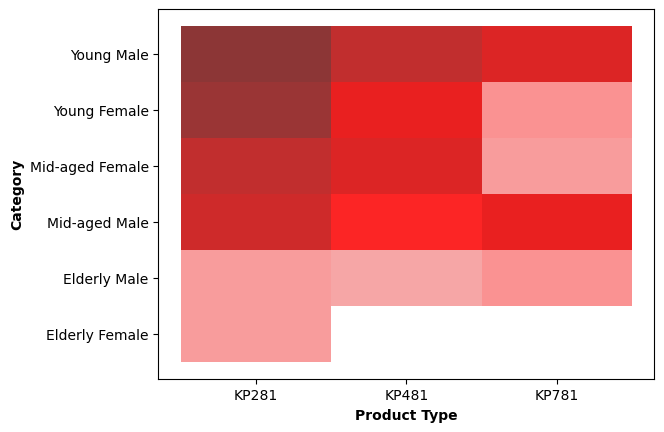

In [60]:
sns.histplot(x = data["Product"], y = data["Category"], color = "red")
plt.xlabel("Product Type", fontweight = "bold")
plt.ylabel("Category", fontweight = "bold")
plt.show()

### Depending upon the Category, 
- KP281 is the first choice of Young Males, Young Females, Mid-aged Females, Mid-aged Males with probabilities of 0.26, 0.25, 0.20, 0.21 respectively.
- KP481 is a good buy for Young Males and Mid-aged Females with probabilities of 0.28 and 0.25 respectively.
- KP781 is the perfect fit for Young Males and Mid-aged Males with probabilities of 0.375, 0.35 respectively.

## Evaluating Incomes

In [61]:
data["Income Slab"].value_counts()

Low         63
Moderate    62
High        55
Name: Income Slab, dtype: int64

In [62]:
pd.crosstab(index = data["Product"], columns = data["Income Slab"], normalize = "index").round(2)

Income Slab,Low,Moderate,High
Product,,,
KP281,0.49,0.38,0.14
KP481,0.40,0.40,0.20
KP781,0.00,0.20,0.80


### Income V/s Product
- P(KP281 | Low) : 0.49
- P(KP281 | Moderate) : 0.38
- P(KP481 | Low) : 0.40
- P(KP481 | Moderate) : 0.40
- P(KP781 | High) : 0.80

### Depending upon the Income
- People falling in high income slab are very highly likely to buy a KP781.
- People falling in low income slab are very highly unlikely to buy a KP781.
- People falling in low income slabs are equally likely to buy a KP281 and KP481.
- People falling in moderate income slabs are equally likely to buy a KP281 and KP481.

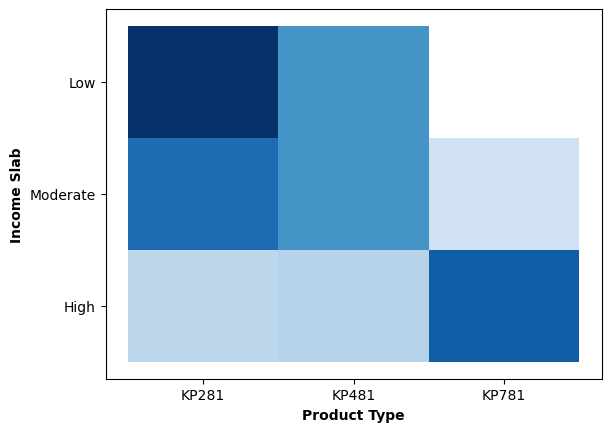

In [63]:
sns.histplot(x = data["Product"], y = data["Income Slab"], cmap = "Blues")
plt.xlabel("Product Type", fontweight = "bold")
plt.ylabel("Income Slab", fontweight = "bold")
plt.show()

# Multivariate Analysis

In [64]:
gender_maritalstatus = data.groupby(["Gender", "MaritalStatus"])["Product"].value_counts().to_frame()
gender_maritalstatus

Product
Gender MaritalStatus Product         
Female Partnered     KP281         27
                     KP481         15
                     KP781          4
       Single        KP481         14
                     KP281         13
                     KP781          3
Male   Partnered     KP281         21
                     KP481         21
                     KP781         19
       Single        KP281         19
                     KP781         14
                     KP481         10

In [65]:
gender_maritalstatus_prob = (gender_maritalstatus/gender_maritalstatus.groupby(["Gender", "MaritalStatus"]).sum()).round(2)
gender_maritalstatus_prob

Product
Gender MaritalStatus Product         
Female Partnered     KP281       0.59
                     KP481       0.33
                     KP781       0.09
       Single        KP481       0.47
                     KP281       0.43
                     KP781       0.10
Male   Partnered     KP281       0.34
                     KP481       0.34
                     KP781       0.31
       Single        KP281       0.44
                     KP781       0.33
                     KP481       0.23

### Gender & Marital Status V/s Product
- P(KP281 | Partnered-female) : 0.59
- P(KP281 | Partnered-male) : 0.34
- P(KP281 | Single-male) : 0.44
- P(KP281 | Single-female) : 0.43
- P(KP481 | Partnered-female) : 0.33
- P(KP481 | Single-female) : 0.47
- P(KP481 | Partnered-male) : 0.34
- P(KP781 | Partnered-male) : 0.31
- P(KP781 | Single-male) : 0.33

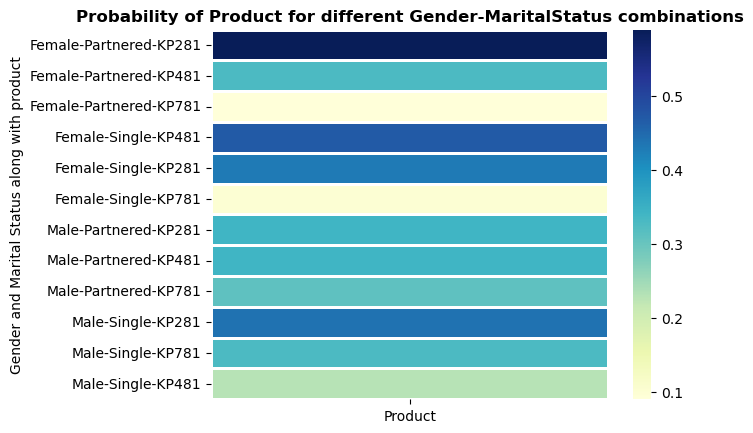

In [66]:
sns.heatmap(gender_maritalstatus_prob, cmap = "YlGnBu", linewidth = 1)
plt.ylabel("Gender and Marital Status along with product")
plt.title("Probability of Product for different Gender-MaritalStatus combinations", fontweight = "bold")
plt.show()

### After analyzing Gender-MaritalStatus combinations, we conclude that :
- A partnered female is highly likely to buy a KP281 treadmill.
- A single female is equally likely to buy KP481 and KP281 treadmills.
- A partnered male is equally likely to buy a KP281 and KP481 treadmills.
- A single male is highly likely to buy a KP281 treadmill.
- A single Male is a good fit to sell KP781.

In [67]:
fit_income = data.groupby(["Fit", "Income Slab"])["Product"].value_counts().to_frame()
fit_income

Product
Fit            Income Slab Product         
Extremely Fit  Low         KP281          6
                           KP481          3
               Moderate    KP781          7
                           KP481          4
                           KP281          3
               High        KP781         29
                           KP281          2
                           KP481          1
Moderately Fit Low         KP281         25
                           KP481         14
               Moderate    KP281         22
                           KP481         15
                           KP781          1
               High        KP481         10
                           KP281          7
                           KP781          3
Unfit          Low         KP281          8
                           KP481          7
               Moderate    KP281          5
                           KP481          5
               High        KP281          2
                           KP481          1

In [68]:
fit_inc_prob = (fit_income/fit_income.groupby(["Fit", "Income Slab"]).sum()).round(2)
fit_inc_prob

Product
Fit            Income Slab Product         
Extremely Fit  Low         KP281       0.67
                           KP481       0.33
               Moderate    KP781       0.50
                           KP481       0.29
                           KP281       0.21
               High        KP781       0.91
                           KP281       0.06
                           KP481       0.03
Moderately Fit Low         KP281       0.64
                           KP481       0.36
               Moderate    KP281       0.58
                           KP481       0.39
                           KP781       0.03
               High        KP481       0.50
                           KP281       0.35
                           KP781       0.15
Unfit          Low         KP281       0.53
                           KP481       0.47
               Moderate    KP281       0.50
                           KP481       0.50
               High        KP281       0.67
                           KP481       0.33

### Income and Fitness V/s Product
- P(KP281 | Low Income and Extremely Fit) : 0.67
- P(KP281 | Low Income and Moderately Fit) : 0.64
- P(KP281 | Moderate Income and Extremely Fit) : 0.58
- P(KP281 | Low Income and Unfit) : 0.53
- P(KP281 | Moderate Income and Unfit) : 0.50
- P(KP281 | Low Income and Unfit) : 0.67
- P(KP481 | High Income and Moderately Fit) : 0.50
- P(KP781 | High Income and Extremely Fit) : 0.91
- P(KP781 | High Income and Moderately Fit) : 0.50

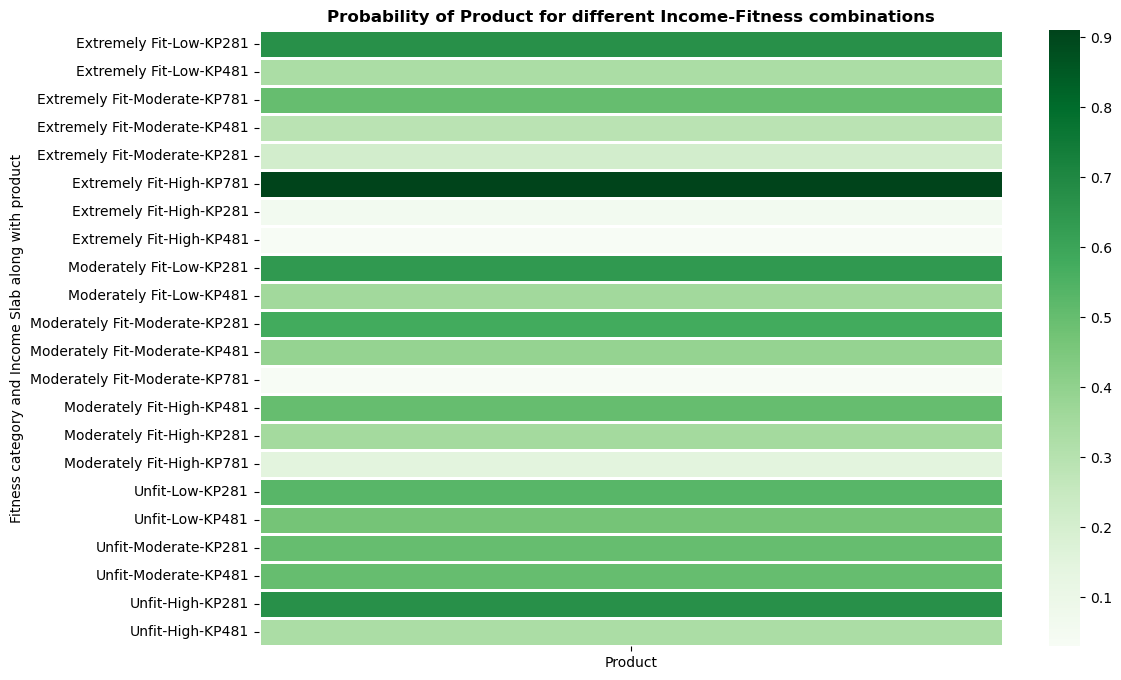

In [69]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(fit_inc_prob, cmap = "Greens", linewidth = 1)
plt.ylabel("Fitness category and Income Slab along with product")
plt.title("Probability of Product for different Income-Fitness combinations", fontweight = "bold")
plt.show()

### After analyzing Fitness-Income combinations, we conclude that :
- An extremely fit or unfit buyer falling in high income slab has a 0.90 and 0.66 probability of buying a KP781 treadmill respectively.
- An moderately fit buyer falling in low or moderate income slab has a 0.64 and 0.57 probability of buying a KP281 treadmill respectively.
- A moderately fit buyer falling in moderate income slab has very less chances(0.026) probability of buying a KP781 treadmill.
- An extremely fit or unfit buyer falling in high income slab has a 0.062, 0.031 probability of buying a KP281 and KP481 treadmill respectively.

# Insights:
- 44.44% users have bought the entry level(KP281), 33.33% users have bought medium level(KP481) and 22.22% uers have bought the advanced level(KP781) treadmills.
- More tham half of the females(52.6%) buy the entry level treadmills.
- Females are very less likely to buy advanced(9.2%) i.e, KP781 treadmills.
- Males are more likely to buy the entry level(38.5%) and advanced level(31.7%) treadmills.
- Entry level treadmills(KP281) are the first choice among Partnered(44.9%) and Single(43.8%) followed by treadmills(KP481) which have 33.6% in Partnered and 32.9% in Single followed by treadmills(KP781) which have 21.5% in Partnered and 23.3% in Single.
- 50% of the people buying KP281 are aged between 18 - 26 years, 50% of the people buying KP481 are aged between 19 - 26 years and 50% of the people buying KP781 are aged between 22 - 27 years.
- Most of the people buying KP781 have given themselves a fitness score of almost 5 independent of their gender and marital status.
- If a person has rated himself/herself to be extremely fit, there is a 0.65 probability that he'll buy a KP781.
- KP281 is the first choice of Young Males, Young Females, Mid-aged Females, Mid-aged Males with probabilities of 0.26, 0.25, 0.20, 0.21 respectively.
- KP781 is the perfect fit for Young Males and Mid-aged Males with probabilities of 0.375, 0.35 respectively.
- A partnered female is highly likely to buy a KP281 treadmill.
- A partnered male is equally likely to buy a KP281 and KP481 treadmills.
- A single male is highly likely to buy a KP281 treadmill.
- An extremely fit or unfit buyer falling in high income slab has a 0.90 and 0.66 probability of buying a KP781 treadmill respectively.
- An moderately fit buyer falling in low or moderate income slab has a 0.64 and 0.57 probability of buying a KP281 treadmill respectively.
- A moderately fit buyer falling in moderate income slab has very less chances(0.026) probability of buying a KP781 treadmill.

## Recommendations:
- KP281 is the first choice of Young(18-26 years) Males, Young Females, Mid-aged(27-40) Females, Mid-aged Males.
- Most of the people intending to use the treadmill around 3 times per week should be targeted with KP281 or KP481 independent of their gender and marital status.
- Most of the people intending to use the treadmill around 5 times per week should be targeted with KP781 independent of their gender and marital status.
- Most of the people who have given themselves a fitness score around 3(Moderately fit) should be targeted with KP281 and KP481 independent of their gender and marital status.
- Most of the people who have given themselves a fitness score around 5(Extremely fit) should be targeted with KP781 independent of their gender and marital status.
- People falling in high income(54577 to 104581\$) slabs should be targeted with KP781.
- People falling in low and moderate income(29561 to 54576$) slabs should be targeted with KP281 and KP481.


## Ideal Customer Segmentation

### The ideal buyers for the following products would be :

### KP281
- A partnered female
- A single male or female
- A buyer with low to moderate income(29561 to 54576$) with any fitness score(1-5)

### KP481
- A single or partnered female
- An unfit(fitness score below 3) buyer with low to moderate(29561 to 54576\$) income
- A moderately fit(fitness score of 3) buyer with high income(above 54577$) 

### KP781
- A single or partnered male
- An extremely fit(fitness score above 4) buyer with high income(above 54577\$)